In [ ]:
import pandas as pd
import numpy as np
!pip install country_converter > /dev/null
import country_converter as coco
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import nltk

%matplotlib inline

In [ ]:
"""
-  job_title : The job title or role associated with the reported salary.¶
-  experience_level : The level of experience of the individual (e.g., Entry-level, Senior-level).
-  employment_type : Indicates whether the employment is full-time, part-time, etc.
-  work_models : Describes different working models (remote, on-site, hybrid).
-  work_year : The specific year in which the salary information was recorded.
-  employee_residence : The residence location of the employee.
-  salary : The reported salary in the original currency.
-  salary_currency : The currency in which the salary is denominated.
-  salary_in_usd : The converted salary in US dollars.
-  company_location : The geographic location of the employing organization.
-  company_size : The size of the company, categorized by the number of employees.
"""


'\n-  job_title : The job title or role associated with the reported salary.¶\n-  experience_level : The level of experience of the individual (e.g., Entry-level, Senior-level).\n-  employment_type : Indicates whether the employment is full-time, part-time, etc.\n-  work_models : Describes different working models (remote, on-site, hybrid).\n-  work_year : The specific year in which the salary information was recorded.\n-  employee_residence : The residence location of the employee.\n-  salary : The reported salary in the original currency.\n-  salary_currency : The currency in which the salary is denominated.\n-  salary_in_usd : The converted salary in US dollars.\n-  company_location : The geographic location of the employing organization.\n-  company_size : The size of the company, categorized by the number of employees.\n'

In [ ]:
### LOAD DATASET

In [ ]:
df = pd.read_csv("/content/drive/Othercomputers/Mon ordinateur portable/Data Science/data_science_salaries.csv")

In [ ]:
df.info()
# 6598 entries
# 11 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd
count,6599.000000,6.599000e+03,6599.000000
mean,2022.818457,1.792833e+05,145560.558569
std,0.674809,5.263722e+05,70946.838070
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,9.600000e+04,95000.000000
50%,2023.000000,1.400000e+05,138666.000000
75%,2023.000000,1.875000e+05,185000.000000
max,2024.000000,3.040000e+07,750000.000000


In [ ]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [ ]:
# Let's first check basic statistics to see what we have in the data

In [ ]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
for column in df.columns:
  print(f"column {column} with a number of unique values")
  print(df[column].nunique())
  print(df[column].unique())
  print("----------------")

column job_title with a number of unique values
132
['Data Engineer' 'Data Scientist' 'BI Developer' 'Research Analyst'
 'Business Intelligence Developer' 'Data Analyst'
 'Director of Data Science' 'MLOps Engineer' 'Machine Learning Scientist'
 'Machine Learning Engineer' 'Data Science Manager' 'Applied Scientist'
 'Business Intelligence Analyst' 'Analytics Engineer'
 'Business Intelligence Engineer' 'Data Science' 'Research Scientist'
 'Research Engineer' 'Managing Director Data Science' 'AI Engineer'
 'Data Specialist' 'Data Architect' 'Data Visualization Specialist'
 'ETL Developer' 'Data Science Practitioner' 'Computer Vision Engineer'
 'Data Lead' 'ML Engineer' 'Data Developer' 'Data Modeler'
 'Data Science Consultant' 'AI Architect' 'Data Analytics Manager'
 'Data Science Engineer' 'Data Product Manager' 'Data Quality Analyst'
 'Data Strategist' 'Prompt Engineer' 'Data Science Lead'
 'Business Intelligence Manager' 'Data Manager' 'Data Analytics Lead'
 'Machine Learning Infrastru

In [ ]:
#Check null values accross the dataset
df.isnull().sum() # 0 nan values

,0
job_title,0
experience_level,0
employment_type,0
work_models,0
work_year,0
employee_residence,0
salary,0
salary_currency,0
salary_in_usd,0
company_location,0


In [ ]:
# Comptage des occurrences des niveaux d'expérience
ex_level = df['experience_level'].value_counts()

# Convertir en DataFrame pour que Plotly l'accepte
ex_level_df = ex_level.reset_index()
ex_level_df.columns = ['experience_level', 'count']  # Renommer les colonnes

# Création du treemap
fig = px.treemap(ex_level_df,
                 path=['experience_level'],  # Spécifier la colonne pour le chemin
                 values='count',              # Spécifier la colonne pour les valeurs
                 title='Experience Level Distribution')

# Affichage du graphique
fig.show(renderer='colab') # pour google collab

In [ ]:
# barplot of the top jobs
top_jobs_count = df["job_title"].value_counts().nlargest(15)
top_jobs = top_jobs_count.index #index pour avoir les noms des jobs plutot que leur fréquence d'apparition
df_temp = df[df["job_title"].isin(top_jobs)]
fig = px.bar(y=top_jobs,x=top_jobs_count)

#plt.yticks(rotation=90) # rotate labels x

# Afficher les valeurs sur les barres
fig.update_traces(text=top_jobs_count, textposition='outside', texttemplate='%{text}')

# Faire pivoter les labels des axes y pour plus de lisibilité
fig.update_layout(yaxis_tickangle=0)

# Inverser l'ordre des barres (du plus fréquent au moins fréquent)
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show(renderer = 'colab')

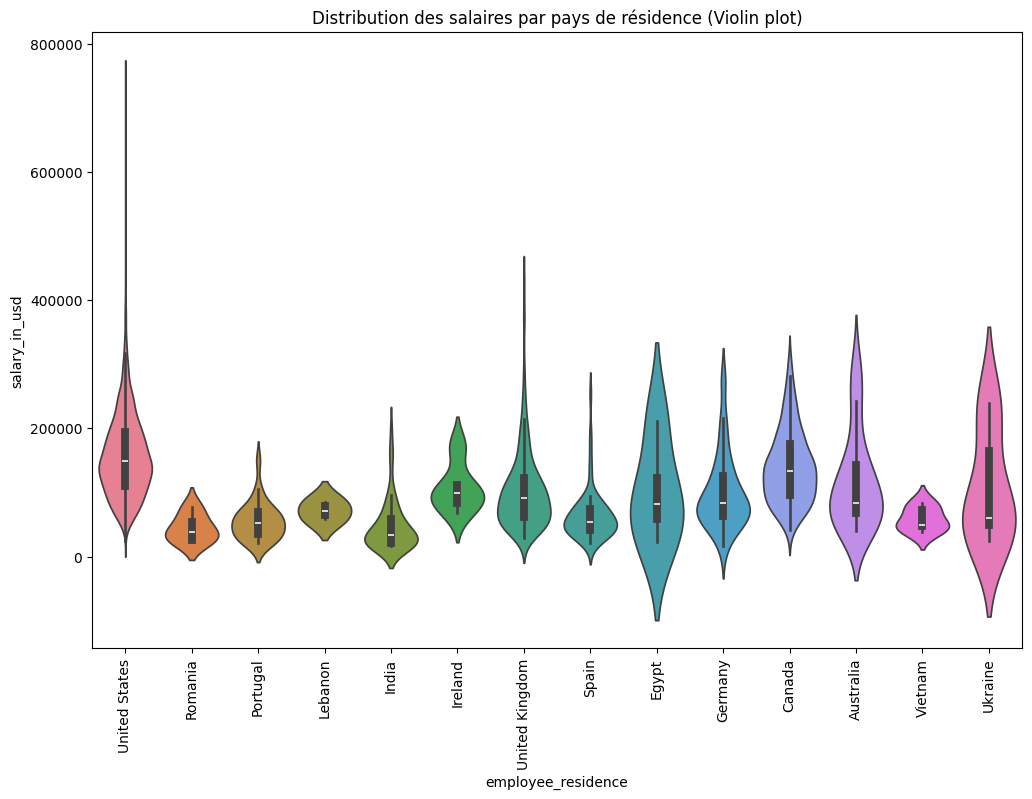

In [ ]:
# First graph we want to build:
# Salaries violin by country
df2 = df[df["employee_residence"].isin(['United States', 'Romania', 'Portugal', 'Lebanon', 'India', 'Ireland', 'United Kingdom', 'Spain', 'Egypt', 'Germany', 'Canada', 'Australia', 'Vietnam', 'Ukraine'])]
#sns.boxplot(x = df2["salary_in_usd"], y = df2["employee_residence"])

plt.figure(figsize=(12, 8))
sns.violinplot(x = df2["employee_residence"], y = df2["salary_in_usd"], hue=df2["employee_residence"])
plt.xticks(rotation=90)
plt.title("Distribution des salaires par pays de résidence (Violin plot)")
plt.show()

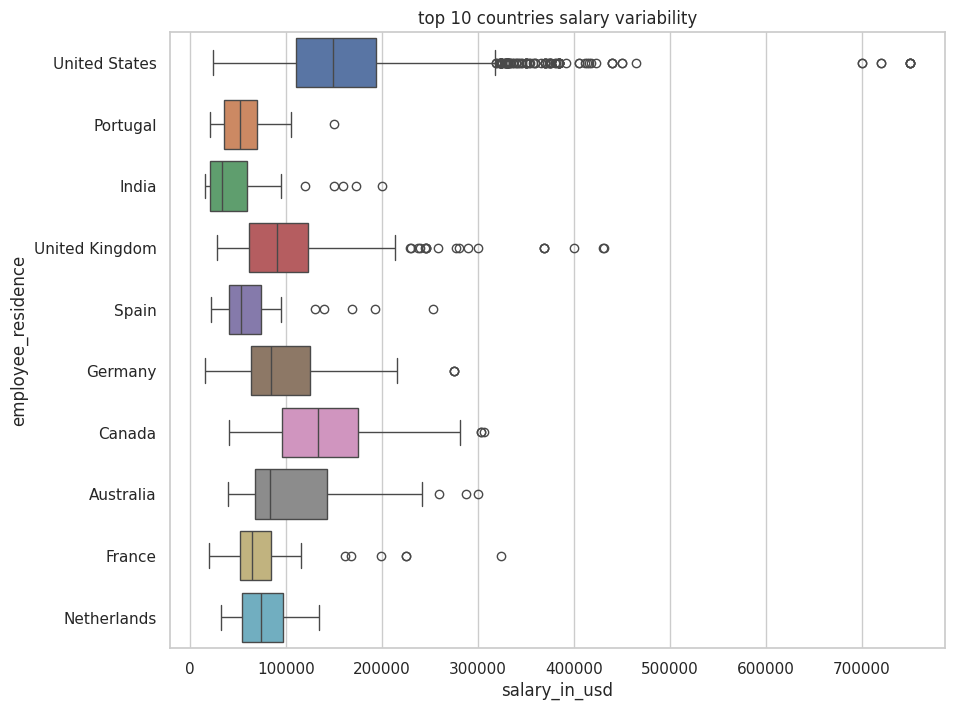

In [ ]:
# let's only take the 10 most represented countries

top_countries = df["employee_residence"].value_counts().nlargest(10).index
top_countries
df3 = df[df["employee_residence"].isin(top_countries)]
plt.figure(figsize=(10, 8))  # Augmenter la taille de la figure pour mieux voir les détails
sns.set(style="whitegrid")  # Ajouter un style de fond pour plus de clarté
sns.boxplot(x = df3["salary_in_usd"], y = df3["employee_residence"], hue = df3["employee_residence"] )
plt.title("top 10 countries salary variability")
plt.show()

In [ ]:
# Now let's go a little bit deeper, doing the very same but looping on the jobtitle (10 top)

top_jobs = df["job_title"].value_counts().nlargest(10).index
top_jobs

Index(['Data Engineer', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Analytics Engineer', 'Research Scientist',
       'Data Architect', 'Research Engineer', 'ML Engineer',
       'Applied Scientist'],
      dtype='object', name='job_title')

 analyzed job: Data Engineer 


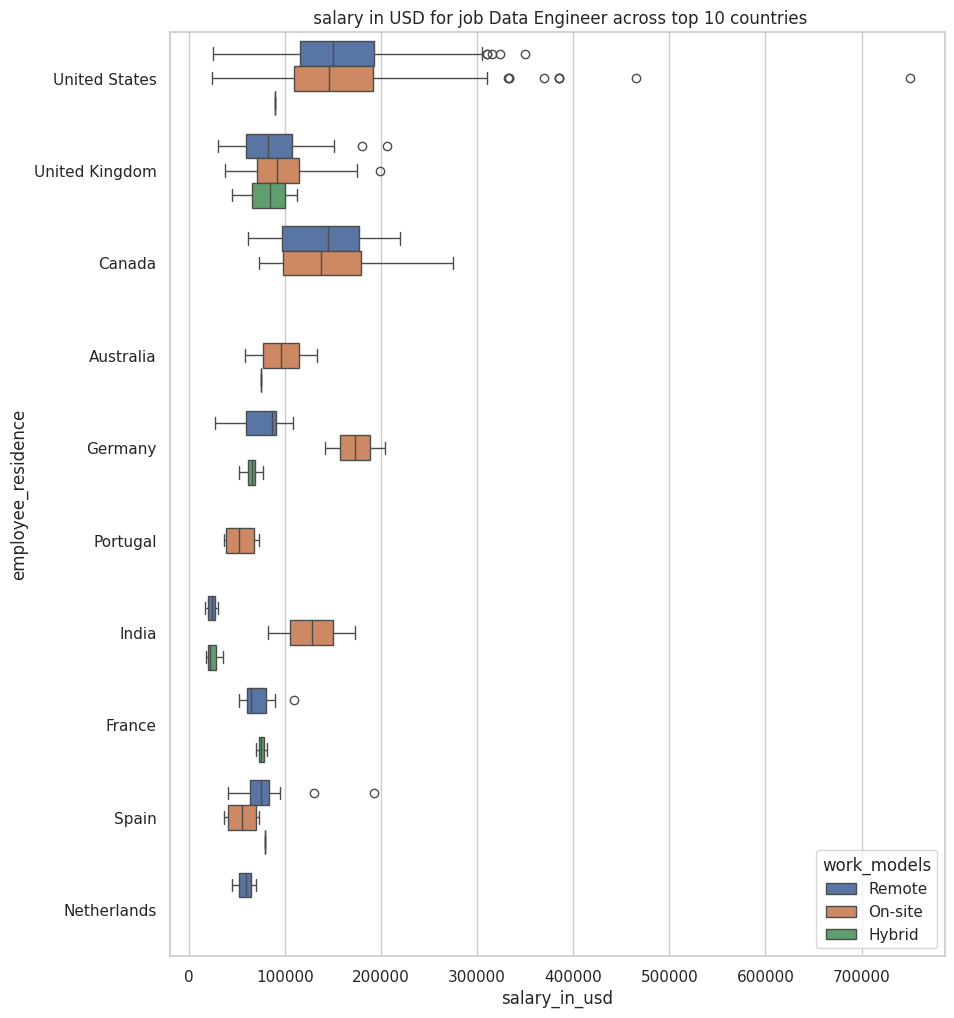

 analyzed job: Data Scientist 


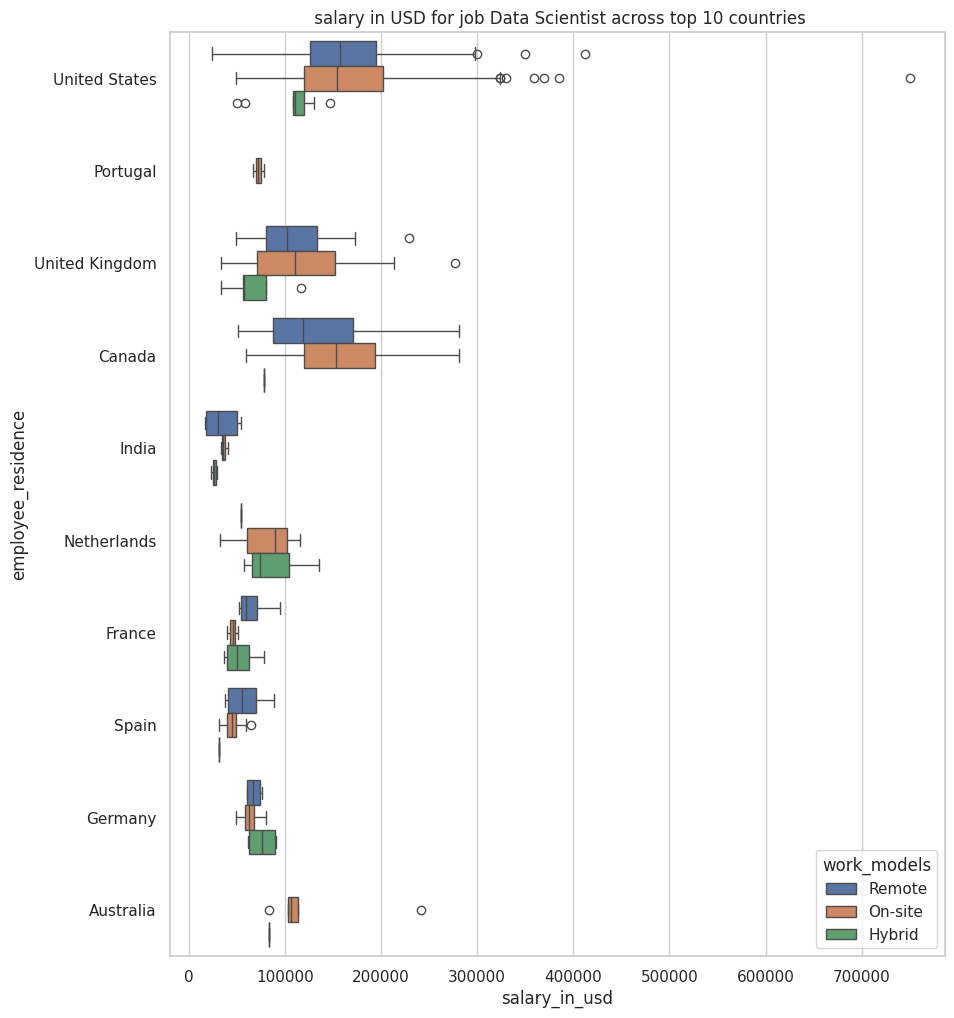

 analyzed job: Data Analyst 


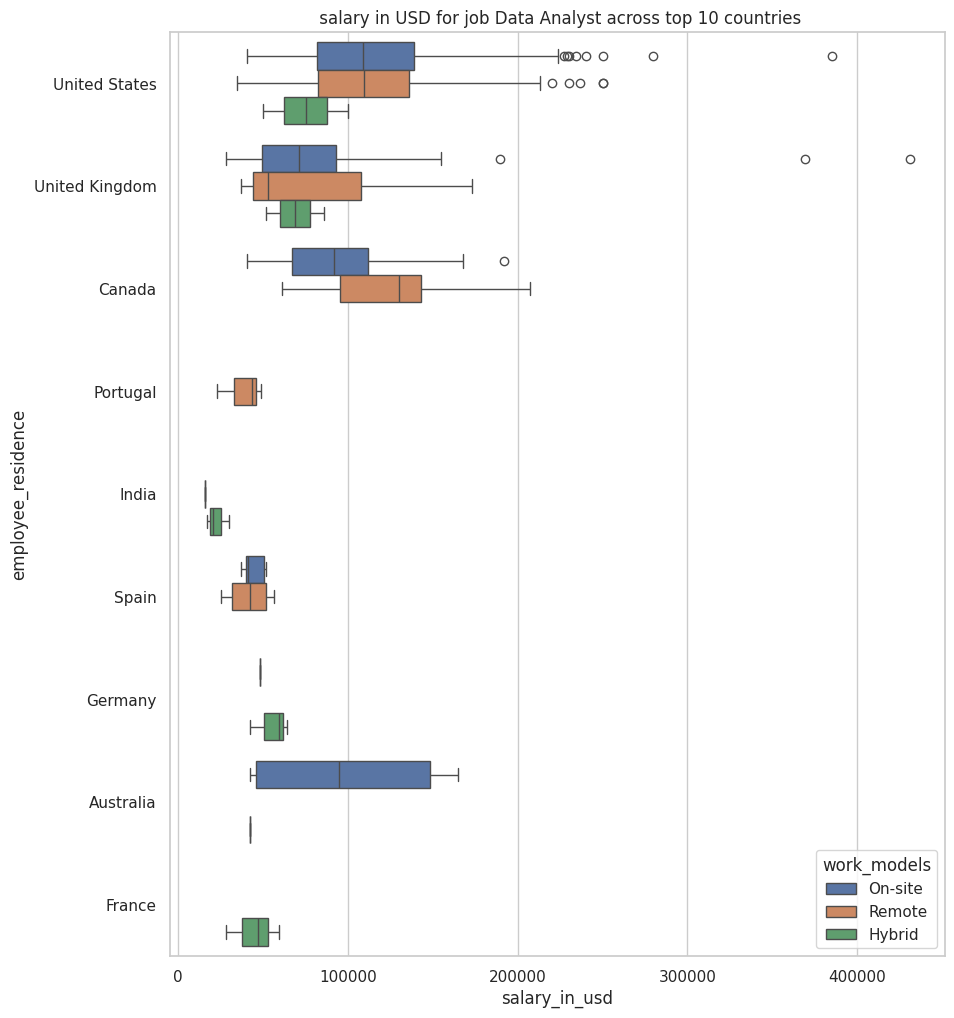

 analyzed job: Machine Learning Engineer 


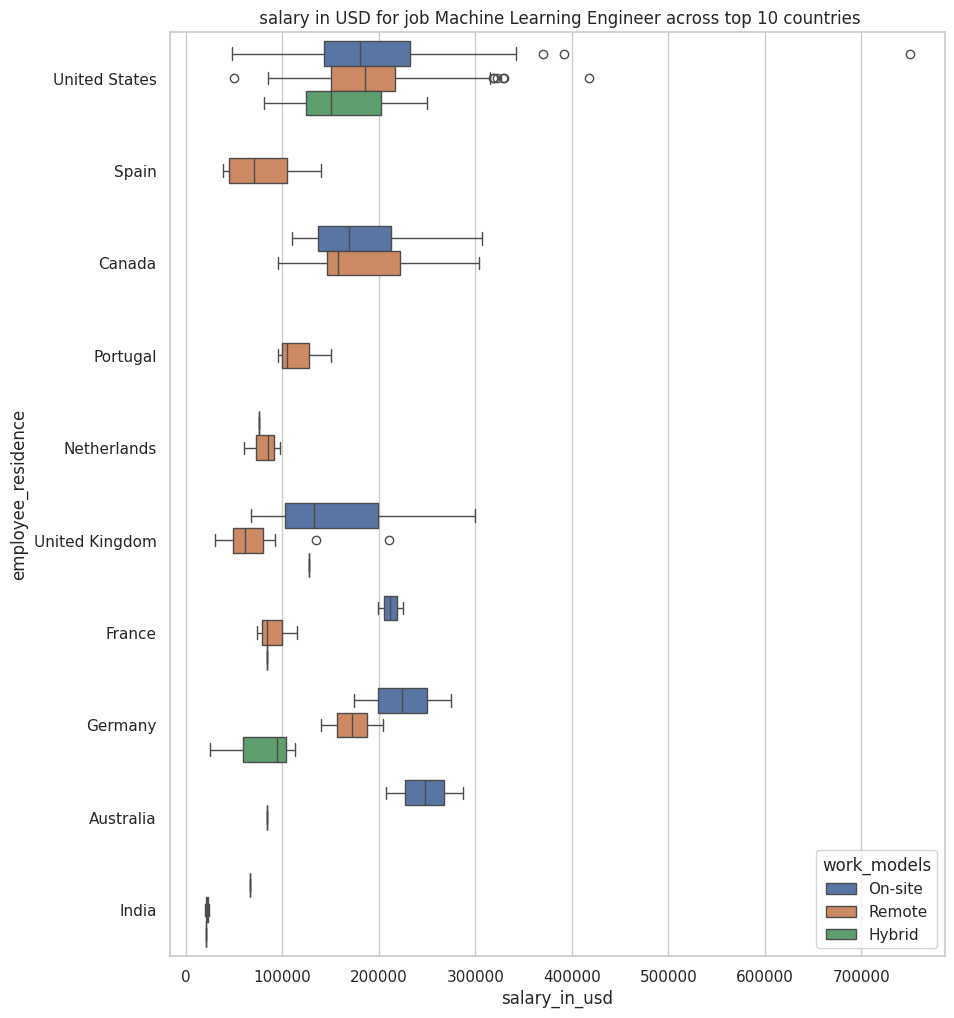

 analyzed job: Analytics Engineer 


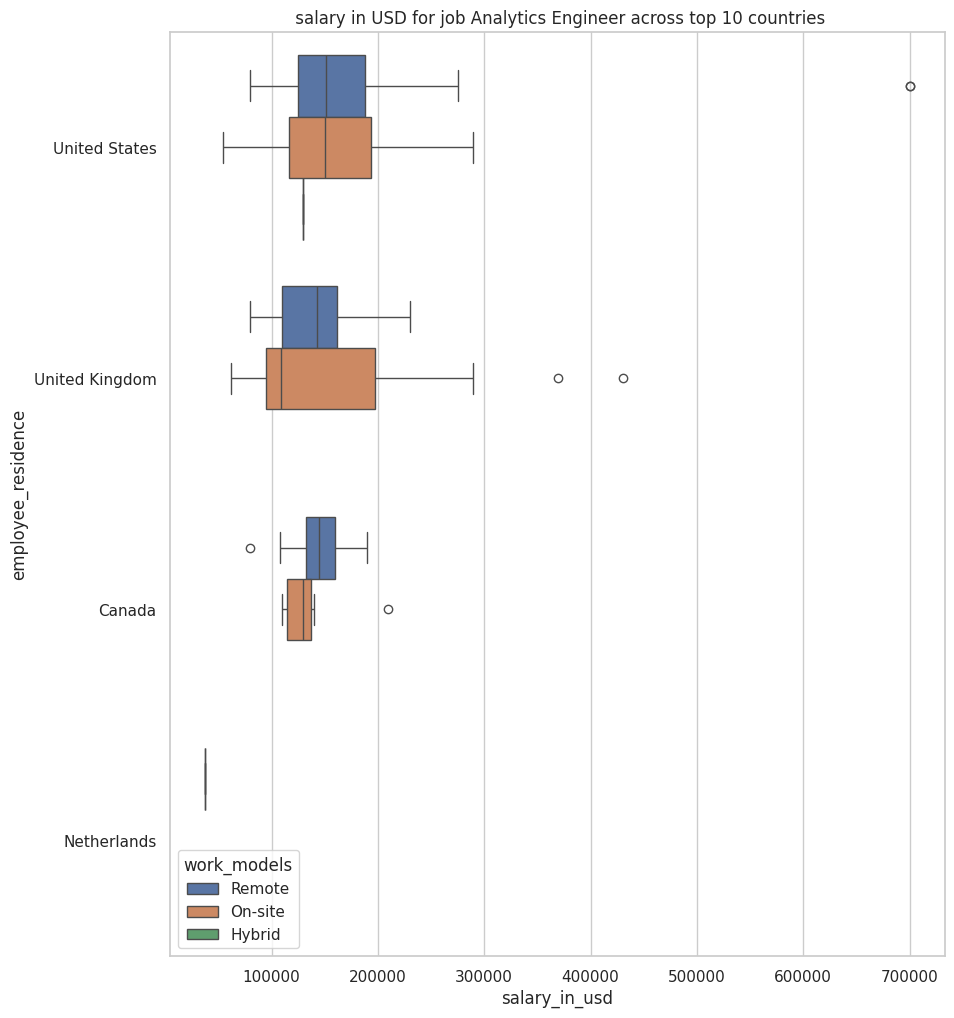

 analyzed job: Research Scientist 


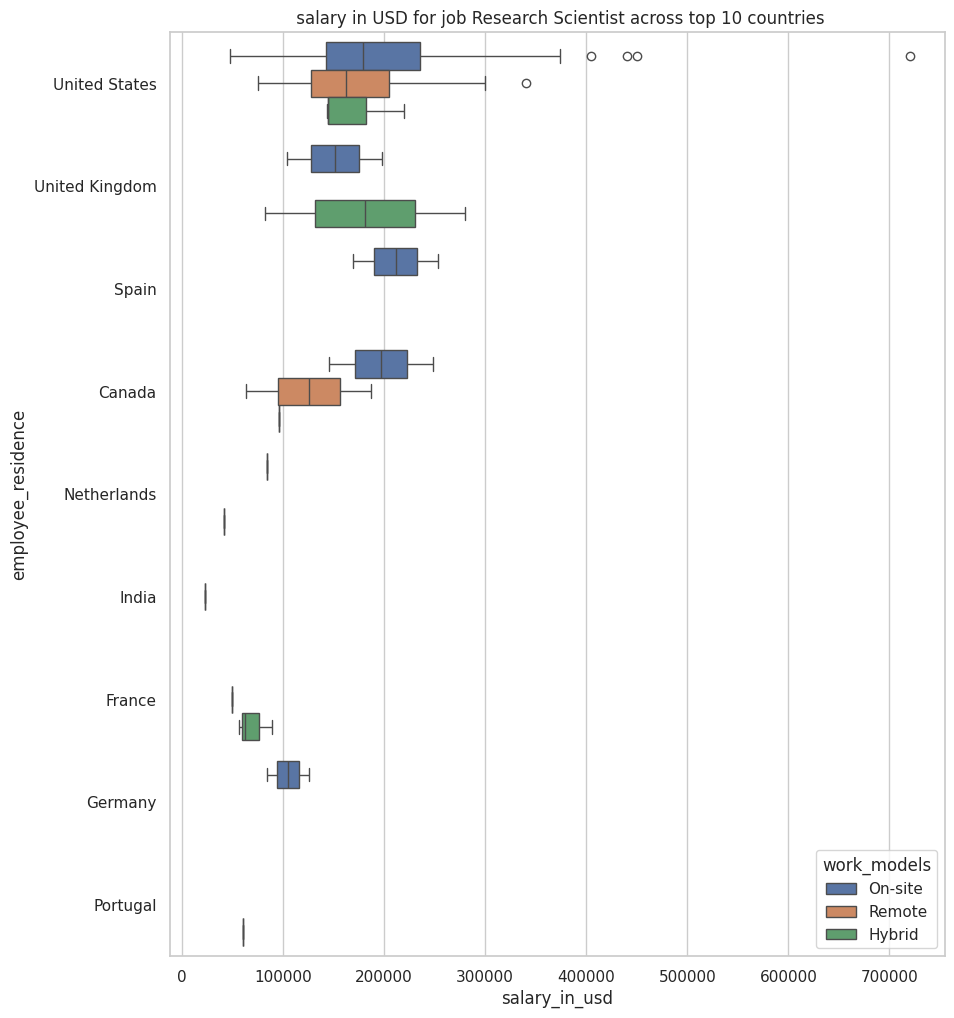

 analyzed job: Data Architect 


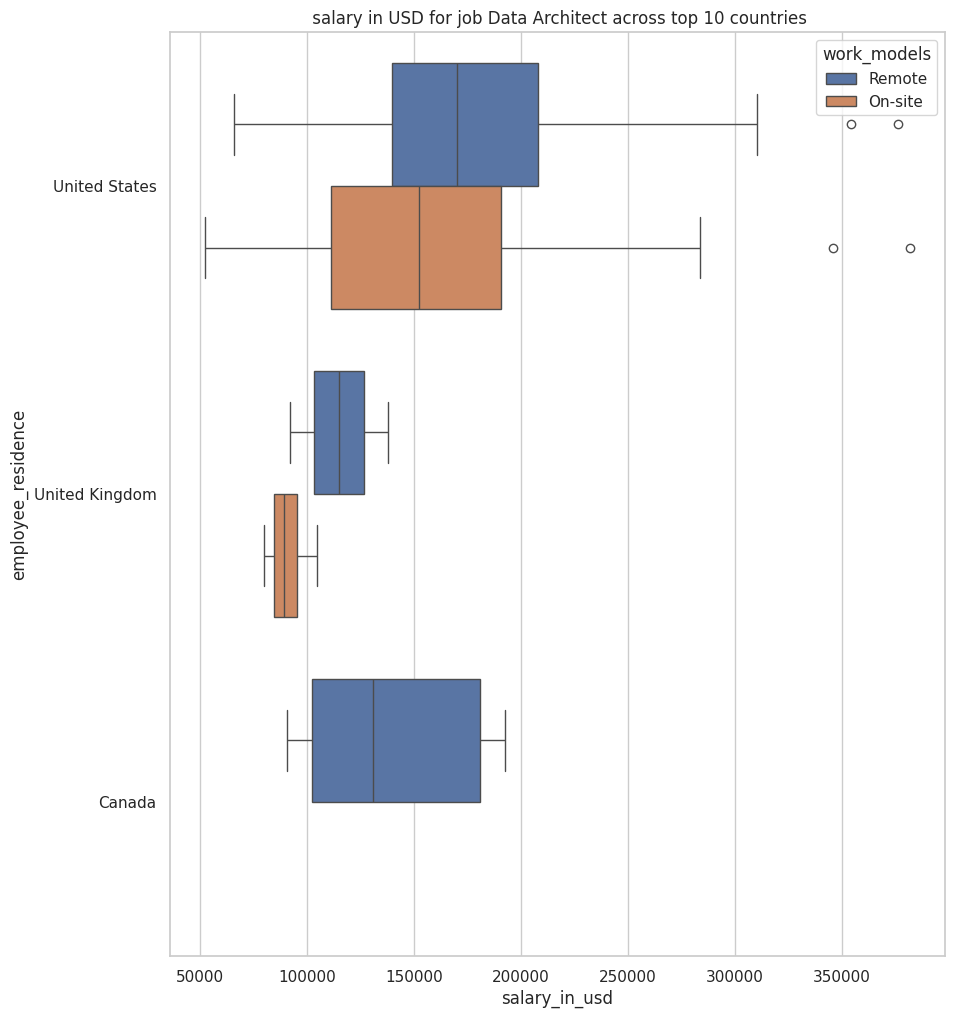

 analyzed job: Research Engineer 


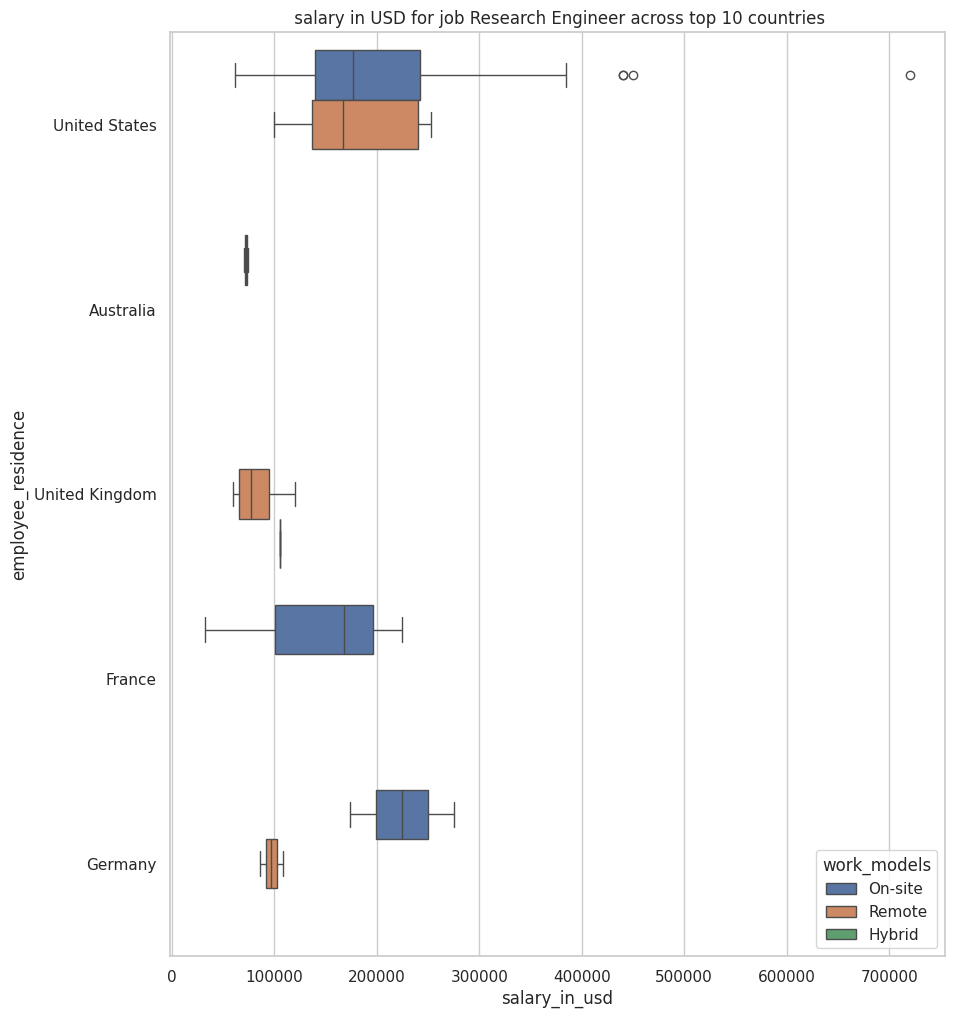

 analyzed job: ML Engineer 


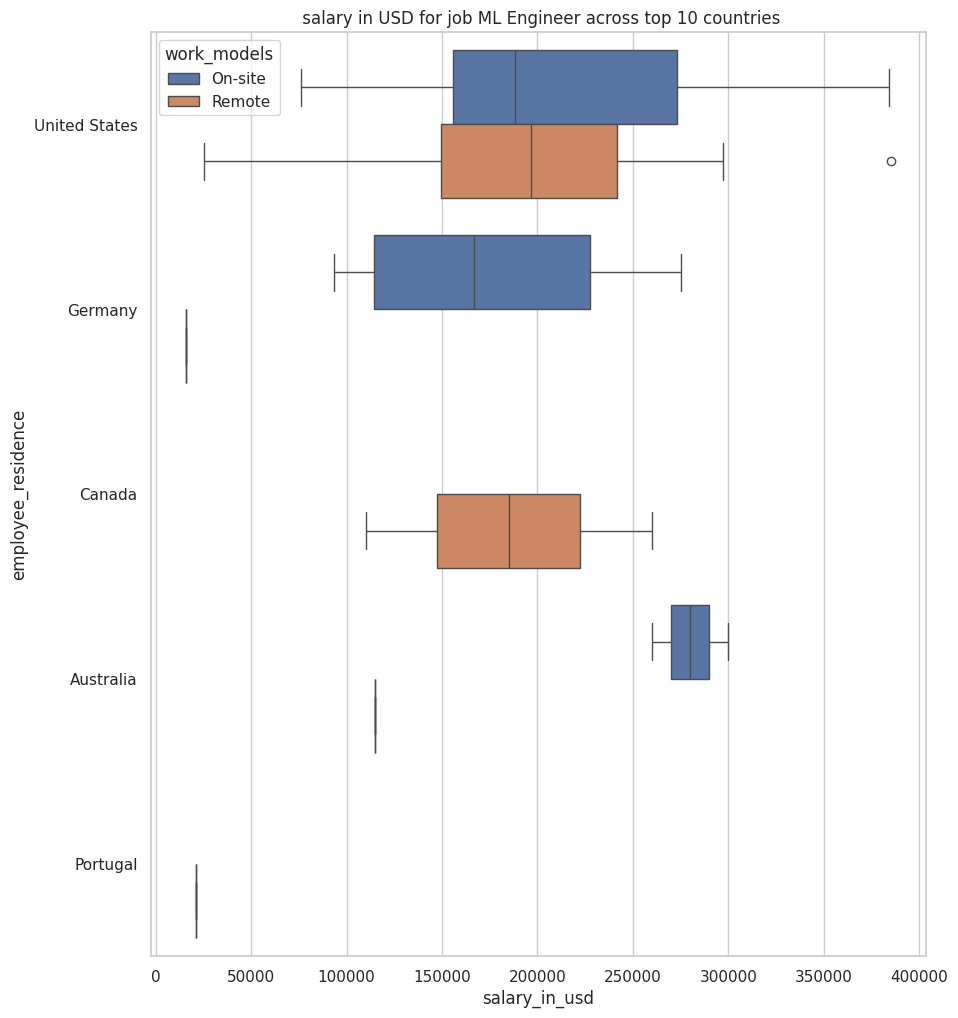

 analyzed job: Applied Scientist 


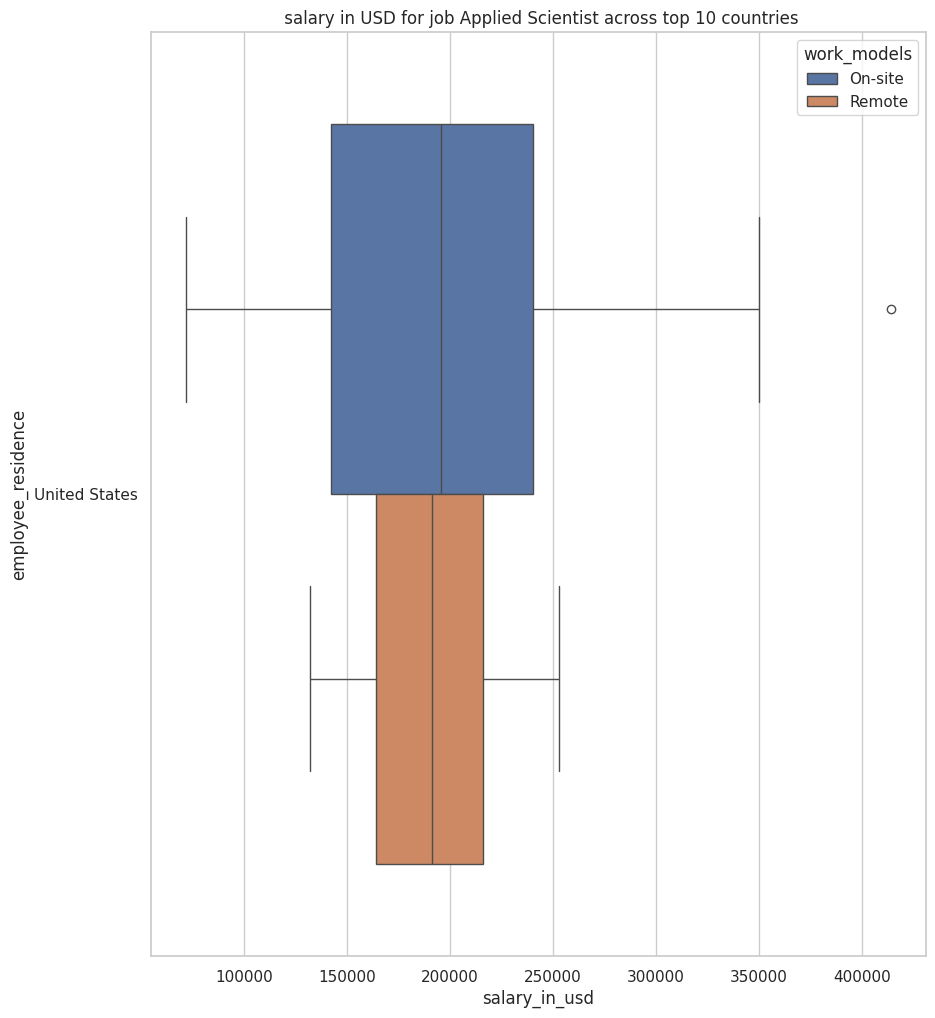

In [ ]:
for job in top_jobs:
  print(f" analyzed job: {job} ")
  df_temp = df3[df3["job_title"] == job]
  plt.figure(figsize = (10,12))
  sns.set(style="whitegrid")  # Ajouter un style de fond pour plus de clarté
  sns.boxplot(x = df_temp["salary_in_usd"], y = df_temp["employee_residence"], hue = df_temp["work_models"] )
  plt.title(f" salary in USD for job {job} across top 10 countries")
  plt.show()

In [ ]:
# Now we want to make a fancy plot with earthmap and location of the jobs
# First convert to correct names
country = coco.convert(names = df['employee_residence'], to = "ISO3") #convert country names to standard ones
country[-10:-1]
df['employee_residence'] = country


In [ ]:
residence = df['employee_residence'].value_counts()
residence

,count
employee_residence,
USA,5305
GBR,401
CAN,241
DEU,71
IND,70
...,...
GEO,1
ISR,1
QAT,1


In [ ]:

# Créer la carte choroplèthe
fig = px.choropleth(
    locations=residence.index,  # Utiliser l'index (pays)
    color=residence.values,  # Utiliser les valeurs (fréquence d'apparition des pays)
    color_continuous_scale=px.colors.sequential.Plasma,  # Choisir une échelle de couleurs (ici "plasma")
    title='Employee Location On Map',  # Titre du graphique
    labels={'color': 'Employee Count'},  # Légende de la couleur
)

# Afficher la carte
fig.show(renderer='colab')

In [ ]:
#Now let's do kinda same map, but showing the average salary for each country

df_grouped = df.groupby("employee_residence")
avg_salary_by_country = df_grouped["salary_in_usd"].mean()
salary_threshold = 200000 # Get rid of outliers
filtered_salary_by_country = avg_salary_by_country[avg_salary_by_country < salary_threshold]


fig = px.choropleth(
    locations=filtered_salary_by_country.index,  # Utiliser l'index (pays)
    color=filtered_salary_by_country.values,  # Utiliser les valeurs (fréquence d'apparition des pays)
    color_continuous_scale=px.colors.sequential.Plasma,  # Choisir une échelle de couleurs (ici "plasma")
    title='country  avg salary  On Map',  # Titre du graphique
    labels={'color': 'salary country'},  # Légende de la couleur
)

# Afficher la carte
fig.show(renderer='colab')


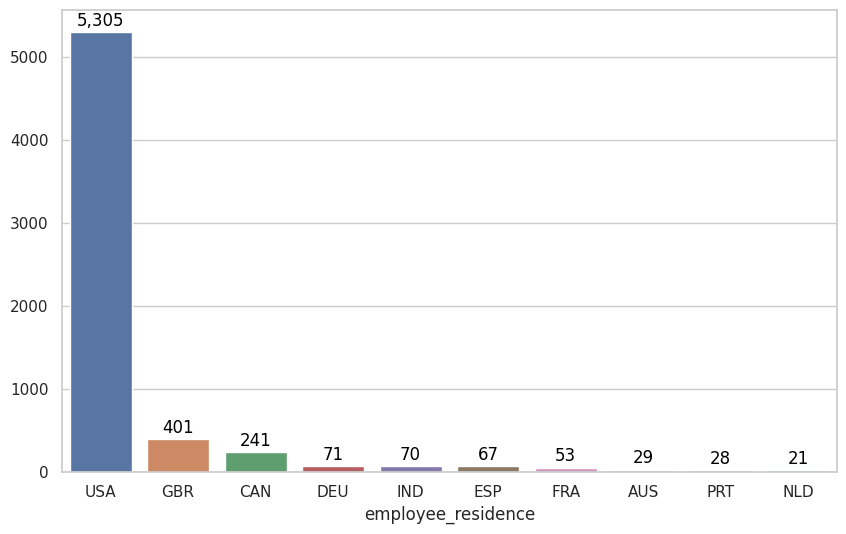

In [ ]:
#Top 10 locations of employees
residence = df['employee_residence'].value_counts().nlargest(10)

plt.figure(figsize = (10,6))
ax = sns.barplot(x = residence.index, y = residence.values, hue = residence.index)
sns.set(style="whitegrid")  # Ajouter un style de fond pour plus de clarté
# Ajouter les valeurs sur les barres
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Afficher la valeur
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position du texte (au sommet de la barre)
                ha='center', va='center',  # Alignement horizontal et vertical
                fontsize=12, color='black',  # Taille et couleur du texte
                xytext=(0, 8),  # Décalage du texte pour ne pas qu'il touche la barre
                textcoords='offset points')
plt.show()


In [ ]:
#Distribution of company size

# Comptage des occurrences des niveaux d'expérience
ex_level = df['experience_level'].value_counts()

# Convertir en DataFrame pour que Plotly l'accepte
ex_level_df = ex_level.reset_index()
ex_level_df.columns = ['experience_level', 'count']  # Renommer les colonnes

# Création du treemap
fig = px.treemap(ex_level_df,
                 path=['experience_level'],  # Spécifier la colonne pour le chemin
                 values='count',              # Spécifier la colonne pour les valeurs
                 title='Experience Level Distribution')

# Affichage du graphique
fig.show(renderer='colab') # pour google collab



In [ ]:

company_size = df["company_size"].value_counts()
df_company_size = company_size.reset_index()

fig = px.treemap(df_company_size, path=["company_size"],
                 values = 'count')
fig.show(renderer = 'colab')


In [ ]:
df_company_size

,company_size,count
0,Medium,5860
1,Large,569
2,Small,170


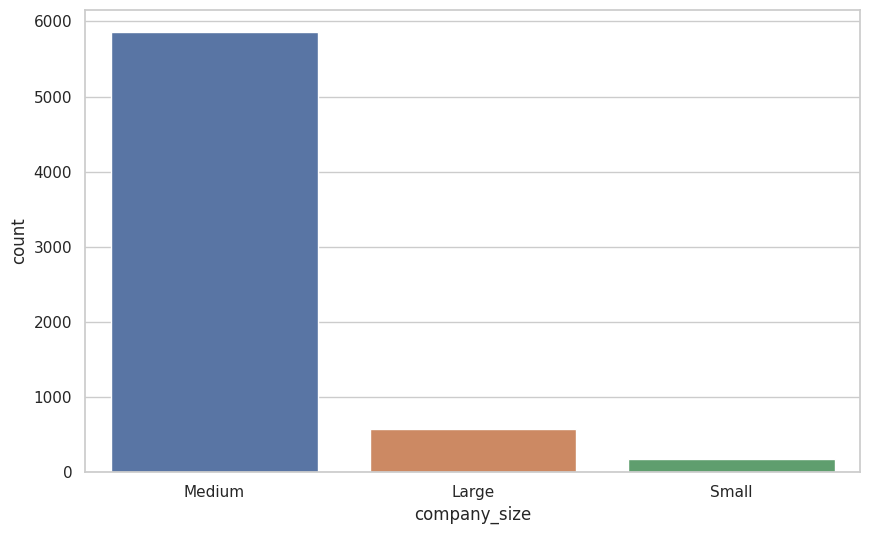

In [ ]:
# other way to do it

company_size = df["company_size"].value_counts()
df_company_size = company_size.reset_index()
fig = plt.figure(figsize = (10,6))
sns.barplot(x = df_company_size["company_size"], y = df_company_size["count"], hue = df_company_size["company_size"])
plt.show()

In [ ]:
#px pie work year distribution
work_years = df['work_year'].value_counts() #[2024, 2023, 2022, 2021, 2020]
work_years

fig = px.pie( values=work_years.values, names=work_years.index, title='workyears')
fig.show(renderer = 'colab')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


In [ ]:
########## MODELLING PART ####################""

In [ ]:
# GOALS

# Now we want to build a model where the goal will be to predict the salary of any people working in this tech job
# Secondary goals:
# 1/ what are the main factor that help these predictions?
# 2/ Any big differences regarding the country? or the experience?
# 3/ Can we use a simple model like a regression or do we need something more complex like xgboost or RF?

In [ ]:
# Methodology:
# Missing values
# Encoding cat variables
# Normalization?
# Build and compare several models
# Results vizualization

In [ ]:
# We saw that there isn't any missing value, bit let's rewrite it anyway.

df.head()
df.isnull().sum()

,0
job_title,0
experience_level,0
employment_type,0
work_models,0
work_year,0
employee_residence,0
salary,0
salary_currency,0
salary_in_usd,0
company_location,0


In [ ]:
# Duplicates?
df.duplicated().sum() # 0

0

In [ ]:
# Categorical variables encoding:
# First let's remind which are cat

# Long way to do it
categorical_var = []
for col in df.columns:
  if df[col].dtype == 'object':
    categorical_var.append(col)

categorical_var

# Fast way to do it
categorical_var = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,USA,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,USA,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,USA,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,USA,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,USA,120000,USD,120000,United States,Medium


In [ ]:
df["experience_level"].unique()

array(['Mid-level', 'Senior-level', 'Entry-level', 'Executive-level'],
      dtype=object)

In [ ]:
# Encoding
# One hot? Ordinal encoding? Get_dummies?

# Odinal for experience_level, employment_type
#

from sklearn.preprocessing import OrdinalEncoder

#onehot
df_encoded = pd.get_dummies(df, columns=["work_models","employment_type"], drop_first=True) # Create one new column for each unique value of work_model
df_encoded # here this variable has a little cardinality, which makes this method fine, in theory


#
# Définir les ordres pour chaque variable ordianle
company_size_order = ['Small', 'Medium', 'Large']  # Ordre : Small < Medium < Large
experience_level_order = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level']  # Ordre :

# Créer un OrdinalEncoder pour les deux colonnes
# Reshape the categories argument for OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[company_size_order, experience_level_order], handle_unknown='use_encoded_value', unknown_value=-1)


# Appliquer l'OrdinalEncoder aux colonnes spécifiées
# Access the 'company_size' and 'experience_level' columns correctly
df_encoded[['company_size_encoded', 'experience_level_encoded']] = ordinal_encoder.fit_transform(df_encoded[['company_size', 'experience_level']].astype(str))


# Supprimer la colonne originale si nécessaire
df_encoded.drop(columns=['company_size', "experience_level"], inplace=True)


# Que faire pour job_title qui a une cardinalité importante?
!pip install category_encoders
import category_encoders as ce

# Appliquer le Binary Encoding
encoder = ce.BinaryEncoder(cols=['job_title',"employee_residence","salary_currency","company_location"]) # 3 variables avec grande cardinalité
df_encoded = encoder.fit_transform(df_encoded)

df_encoded



,job_title_0,job_title_1,job_title_2,job_title_3,job_title_4,job_title_5,job_title_6,job_title_7,work_year,employee_residence_0,...,company_location_4,company_location_5,company_location_6,work_models_On-site,work_models_Remote,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,company_size_encoded,experience_level_encoded
0,0,0,0,0,0,0,0,1,2024,0,...,0,0,1,False,True,False,True,False,1.0,1.0
1,0,0,0,0,0,0,0,1,2024,0,...,0,0,1,False,True,False,True,False,1.0,1.0
2,0,0,0,0,0,0,1,0,2024,0,...,0,0,1,False,True,False,True,False,1.0,2.0
3,0,0,0,0,0,0,1,0,2024,0,...,0,0,1,False,True,False,True,False,1.0,2.0
4,0,0,0,0,0,0,1,1,2024,0,...,0,0,1,True,False,False,True,False,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6594,0,1,0,1,1,1,1,0,2020,0,...,0,1,1,False,False,False,False,False,2.0,0.0
6595,0,1,0,1,1,1,1,0,2020,0,...,0,1,1,True,False,False,True,False,1.0,3.0
6596,0,1,0,0,0,1,1,1,2020,0,...,0,1,1,False,False,False,True,False,2.0,2.0
6597,0,0,0,0,0,0,0,1,2020,0,...,0,1,1,False,False,False,True,False,2.0,1.0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   job_title_0                6599 non-null   int64  
 1   job_title_1                6599 non-null   int64  
 2   job_title_2                6599 non-null   int64  
 3   job_title_3                6599 non-null   int64  
 4   job_title_4                6599 non-null   int64  
 5   job_title_5                6599 non-null   int64  
 6   job_title_6                6599 non-null   int64  
 7   job_title_7                6599 non-null   int64  
 8   experience_level           6599 non-null   object 
 9   work_year                  6599 non-null   int64  
 10  employee_residence_0       6599 non-null   int64  
 11  employee_residence_1       6599 non-null   int64  
 12  employee_residence_2       6599 non-null   int64  
 13  employee_residence_3       6599 non-null   int64

In [ ]:
#Now data normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['salary_in_usd']] = scaler.fit_transform(df_encoded[['salary_in_usd']])
pd.set_option('display.max_columns', None)
df_encoded

,job_title_0,job_title_1,job_title_2,job_title_3,job_title_4,job_title_5,job_title_6,job_title_7,work_year,employee_residence_0,employee_residence_1,employee_residence_2,employee_residence_3,employee_residence_4,employee_residence_5,employee_residence_6,salary,salary_currency_0,salary_currency_1,salary_currency_2,salary_currency_3,salary_currency_4,salary_in_usd,company_location_0,company_location_1,company_location_2,company_location_3,company_location_4,company_location_5,company_location_6,work_models_On-site,work_models_Remote,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,company_size_encoded,experience_level_encoded
0,0,0,0,0,0,0,0,1,2024,0,0,0,0,0,0,1,148100,0,0,0,0,1,0.035796,0,0,0,0,0,0,1,False,True,False,True,False,1.0,1.0
1,0,0,0,0,0,0,0,1,2024,0,0,0,0,0,0,1,98700,0,0,0,0,1,-0.660552,0,0,0,0,0,0,1,False,True,False,True,False,1.0,1.0
2,0,0,0,0,0,0,1,0,2024,0,0,0,0,0,0,1,140032,0,0,0,0,1,-0.077931,0,0,0,0,0,0,1,False,True,False,True,False,1.0,2.0
3,0,0,0,0,0,0,1,0,2024,0,0,0,0,0,0,1,100022,0,0,0,0,1,-0.641917,0,0,0,0,0,0,1,False,True,False,True,False,1.0,2.0
4,0,0,0,0,0,0,1,1,2024,0,0,0,0,0,0,1,120000,0,0,0,0,1,-0.360305,0,0,0,0,0,0,1,True,False,False,True,False,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6594,0,1,0,1,1,1,1,0,2020,0,0,0,1,0,1,1,60000,1,0,0,0,0,-1.420996,0,0,0,1,0,1,1,False,False,False,False,False,2.0,0.0
6595,0,1,0,1,1,1,1,0,2020,0,0,1,0,1,0,1,15000,0,0,0,0,1,-1.840398,0,0,0,1,0,1,1,True,False,False,True,False,1.0,3.0
6596,0,1,0,0,0,1,1,1,2020,0,0,0,1,0,1,1,157000,1,0,0,0,0,-0.401127,0,0,0,1,0,1,1,False,False,False,True,False,2.0,2.0
6597,0,0,0,0,0,0,0,1,2020,0,1,1,1,0,1,0,65000,0,0,0,1,1,-1.006894,1,0,0,0,0,1,1,False,False,False,True,False,2.0,1.0


<Axes: xlabel='None', ylabel='salary_in_usd'>

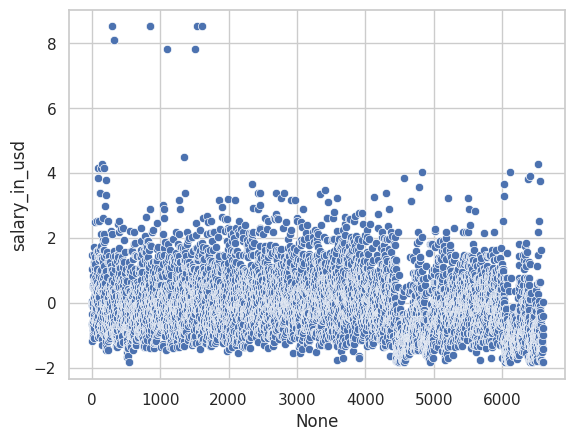

In [ ]:
sns.scatterplot(y = df_encoded["salary_in_usd"], x = df_encoded.index) # Several outliers (maybe executive level salaries)

<Axes: >

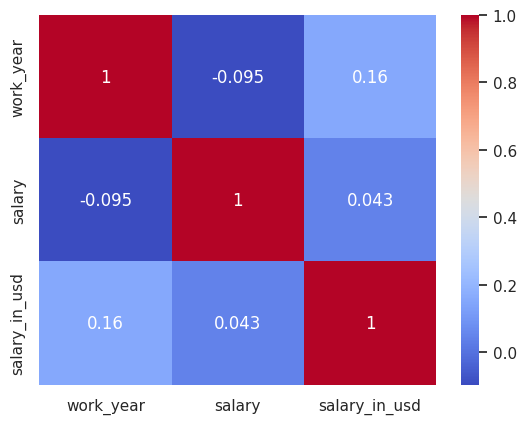

In [ ]:
# Correlations
df_numeric = df.select_dtypes(include=['number'])

# Calculer la matrice de corrélation pour les variables numériques uniquement
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot = True, cmap="coolwarm")

In [ ]:
# Train test
import sklearn
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['salary_in_usd'])
Y = df_encoded['salary_in_usd']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

MAE: 0.6075977555790532
RMSE: 0.6763657210243034
R²: 0.30810942212323844


<Axes: xlabel='salary_in_usd'>

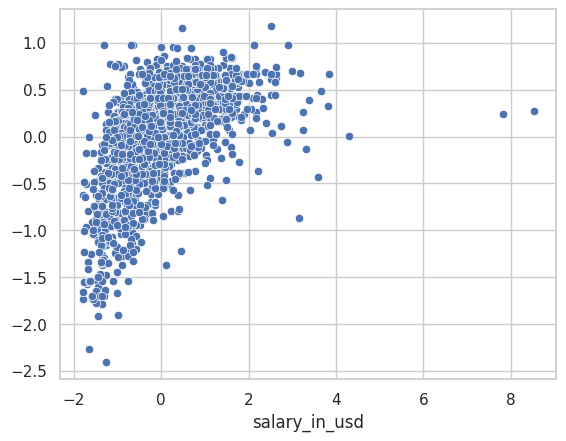

In [ ]:
# Now let's build the first model
# let's start with linear reg

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

LR = LinearRegression()
LR.fit(X_train,Y_train)

Y_pred = LR.predict(X_test)

print("MAE:", mean_absolute_error(Y_test, Y_pred))
print("RMSE:", mean_squared_error(Y_test, Y_pred))
print("R²:", r2_score(Y_test, Y_pred))

sns.scatterplot(x = Y_test, y = Y_pred)

MAE: 0.019816091943932624
RMSE: 0.04579812515290379
R²: 0.9531506546048387


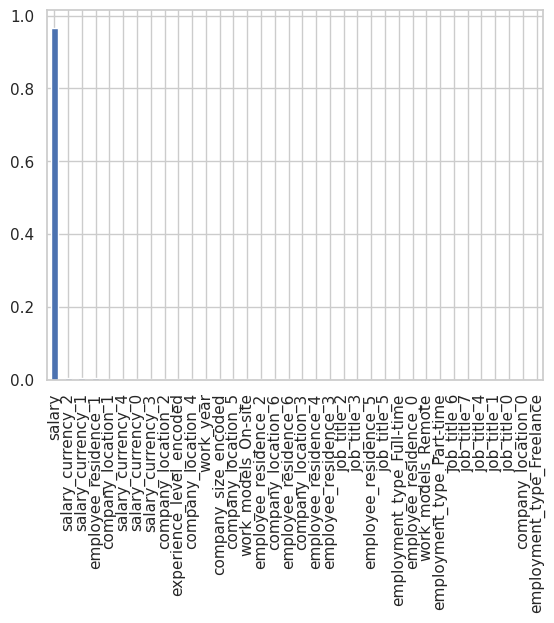

In [ ]:
# Same with random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

print("MAE:", mean_absolute_error(Y_test, Y_pred))
print("RMSE:", mean_squared_error(Y_test, Y_pred))
print("R²:", r2_score(Y_test, Y_pred)) #### Bien bien meilleur


#sns.scatterplot(x = Y_test, y = Y_pred) # actual vs predicted

# Affichage des importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.show()

MAE: 0.02163598421108589
RMSE: 0.025000444819512115
R²: 0.9744257113043037


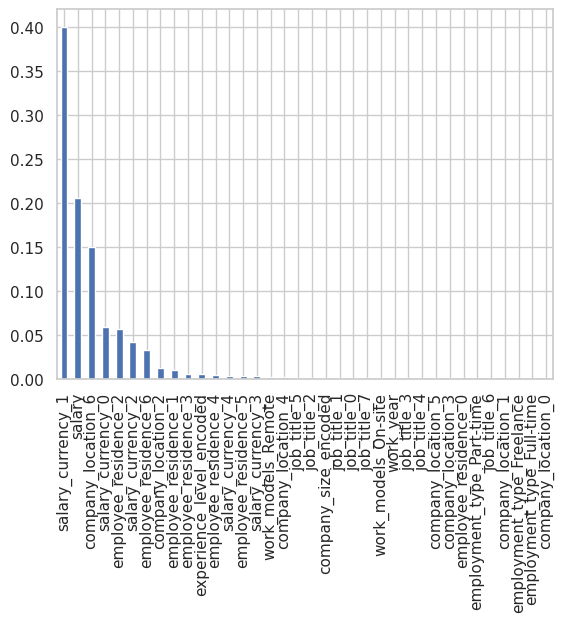

In [ ]:
#Same with Xgboost

from xgboost import XGBRegressor

XGBR = XGBRegressor()
XGBR.fit(X_train, Y_train)

Y_pred = XGBR.predict(X_test)

print("MAE:", mean_absolute_error(Y_test, Y_pred))
print("RMSE:", mean_squared_error(Y_test, Y_pred))
print("R²:", r2_score(Y_test, Y_pred)) #### equivalent a RF
#sns.scatterplot(x = Y_test, y = Y_pred)

# Affichage des importances
importances = pd.Series(XGBR.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [ ]:
# Now we would like to keep RF as our reference (best R²)
# Let's see if we can optimize our hyperparamters

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, Y_train)

print("Meilleurs paramètres:", grid_search.best_params_)

Meilleurs paramètres: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


MAE: 0.018980720059613942
RMSE: 0.04642685387267358
R²: 0.9525074944568194


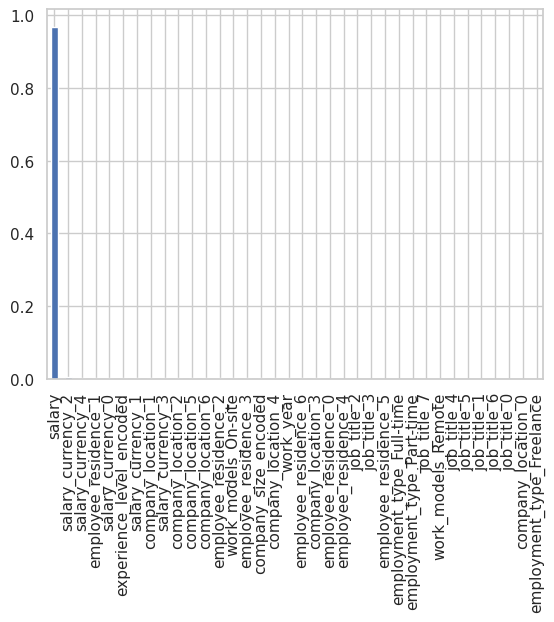

In [ ]:
rf = RandomForestRegressor(max_depth = None, min_samples_split = 2, n_estimators= 200)
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

print("MAE:", mean_absolute_error(Y_test, Y_pred))
print("RMSE:", mean_squared_error(Y_test, Y_pred))
print("R²:", r2_score(Y_test, Y_pred)) #### Bien bien meilleur


#sns.scatterplot(x = Y_test, y = Y_pred) # actual vs predicted

# Affichage des importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.show()

 99%|===================| 1635/1650 [00:40<00:00]       

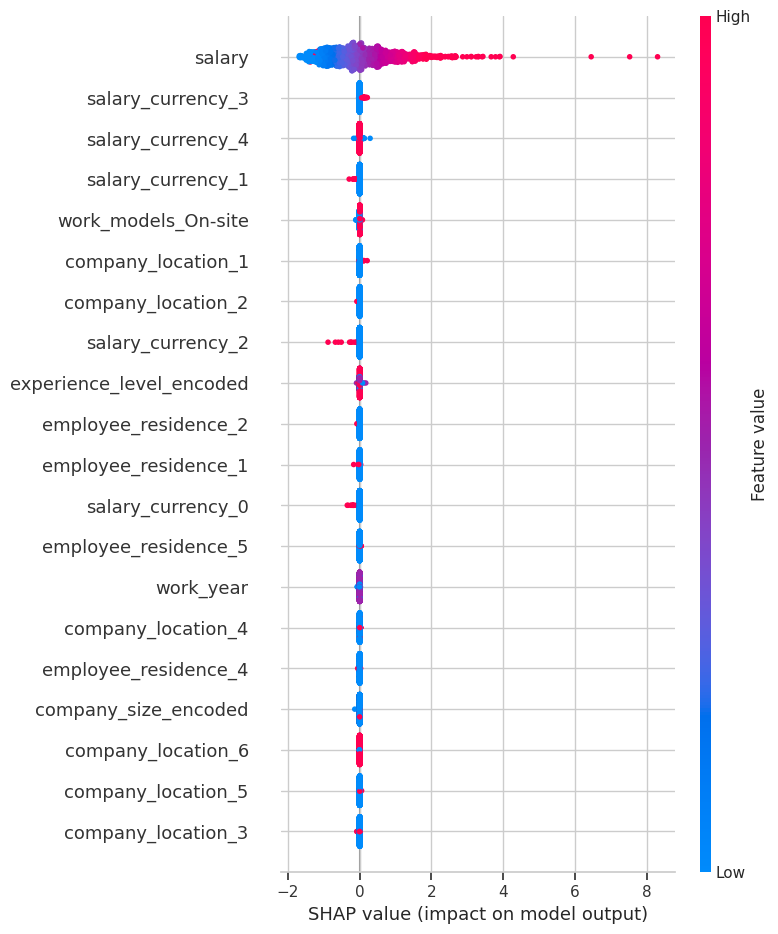

In [ ]:
import shap
import numpy as np # import numpy

# Convert X_test to numeric using a safe method like to_numpy() with dtype=np.float64
X_test_numeric = X_test.to_numpy(dtype=np.float64)
# if you have any issue, drop columns that cant be converted

explainer = shap.Explainer(rf, X_test_numeric) # Changed here too
shap_values = explainer(X_test_numeric) # and here

shap.summary_plot(shap_values, X_test)

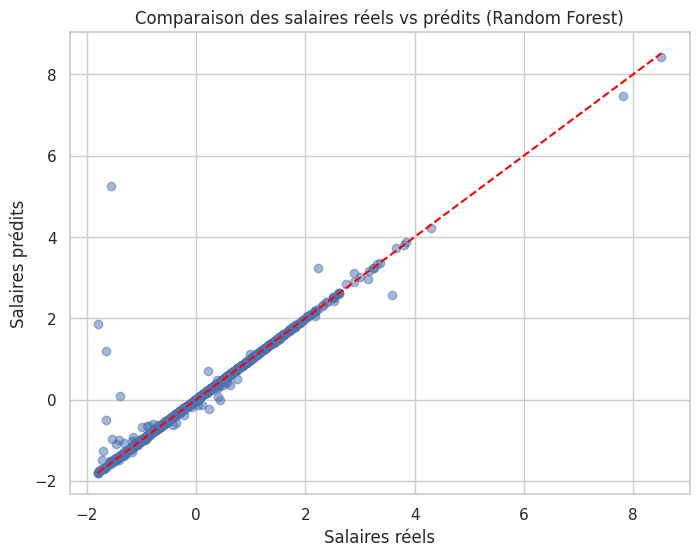

In [ ]:
# Plots actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.xlabel("Salaires réels")
plt.ylabel("Salaires prédits")
plt.title("Comparaison des salaires réels vs prédits (Random Forest)")
plt.show()

In [ ]:
"""
Quel modèle est le plus performant ? On compare les métriques des modèles testés (R², RMSE, MAE).
Quelles variables influencent le plus les salaires ? On utilise SHAP ou les coefficients du modèle linéaire.
Peut-on améliorer le modèle ? Essayer d’autres techniques : réseaux de neurones, plus de features, clustering pour segmenter les profils.


Pour aller encore plus loin, on peut explorer :

L’analyse des tendances salariales dans le temps (si le dataset contient plusieurs années).
Un modèle de classification pour prédire une fourchette de salaire au lieu d’un salaire exact.
Une API ou une interface web pour interagir avec le modèle.
"""